In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")
sys.path.insert(0, "../0.data-download/scripts/")
from data_loader import load_data, load_train_test_data

In [2]:
# data path
data_directory = "../0.data-download/data/"

In [3]:
# load the training data
dfs_test, dfs, data = load_train_test_data(
    data_directory, train_or_test="all", load_gene_stats=False
)

In [4]:
# set a unique dataframe that can be appended from
training_df_age = dfs

# group by age and create new dataframes that can be appended to
groups = training_df_age.groupby("age_and_sex")
adult_dependency_df = pd.DataFrame()
ped_dependency_df = pd.DataFrame()
for name, training_df_age in groups:

    # append rows that contain Adult samples (male or female) to the new adult dependency dataframe
    if name == "Adult_Male" or name == "Adult_Female" or name == "Adult_nan":
        adult_dependency_df = adult_dependency_df.append(training_df_age)
        adult_dependency_df = adult_dependency_df.reset_index(drop=True)

    # append rows that contain Pediatric samples (male ore female) to the new pediatric dataframe
    else:
        ped_dependency_df = ped_dependency_df.append(training_df_age)
        ped_dependency_df = ped_dependency_df.reset_index(drop=True)

In [5]:
# set a unique dataframe that can be appended from
training_df_sex = dfs

# group by sex and create new dataframes to be appended to
groups_sex = training_df_sex.groupby("age_and_sex")
male_dependency_df = pd.DataFrame()
female_dependency_df = pd.DataFrame()
for name, training_df_sex in groups_sex:

    # append rows that contain Male samples (Adult or Pediatric) to the new male dependency dataframe and filter out samples that contain no gender info
    if (
        name == "Adult_Male"
        or name == "Pediatric_Male"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        male_dependency_df = male_dependency_df.append(training_df_sex)
        male_dependency_df = male_dependency_df.reset_index(drop=True)

    # append rows that contain Female samples (Adult or Pediatric) to the new female dependency dataframe and filter out samples that contain no gender info
    elif (
        name == "Adult_Female"
        or name == "Pediatric_Female"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        female_dependency_df = female_dependency_df.append(training_df_sex)
        female_dependency_df = female_dependency_df.reset_index(drop=True)

In [6]:
print(adult_dependency_df.shape)
adult_dependency_df.head(3)

(115, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000288,0.016983,0.058230,0.014237,0.042621,0.116682,0.023993,0.010857,0.558349,0.076136,...,0.204487,0.104914,0.287556,0.042241,0.030508,0.032900,0.522408,0.197410,0.627564,Adult_Female
1,ACH-000701,0.146827,0.074509,0.034836,0.012635,0.149864,0.014481,0.043878,0.482275,0.023246,...,0.011220,0.021019,0.878102,0.063242,0.046081,0.025801,0.030127,0.029867,0.478795,Adult_Female
2,ACH-002233,0.037063,0.149304,0.035900,0.019886,0.030690,0.026871,0.023319,0.016031,0.027262,...,0.200692,0.041964,0.884667,0.017926,0.014128,0.086924,0.025266,0.089148,0.008779,Adult_Female


In [7]:
print(ped_dependency_df.shape)
ped_dependency_df.head(3)

(18, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000226,0.020777,0.049408,0.014872,0.030864,0.064875,0.099194,0.127499,0.060952,0.012082,...,0.488901,0.950711,0.905663,0.003693,0.022772,0.024645,0.035180,0.064562,0.168809,Pediatric_Female
1,ACH-000259,0.184794,0.021847,0.071038,0.025367,0.079060,0.081669,0.026581,0.080330,0.058170,...,0.623372,0.163482,0.020830,0.071306,0.039098,0.110497,0.030758,0.079246,0.504447,Pediatric_Female
2,ACH-002069,0.057517,0.031263,0.008939,0.020381,0.055781,0.025666,0.020403,0.353576,0.017206,...,0.241117,0.036150,0.966214,0.031622,0.115540,0.025002,0.033132,0.197451,0.351265,Pediatric_Female


In [8]:
print(male_dependency_df.shape)
male_dependency_df.head(3)

(75, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000274,0.033623,0.031185,0.035355,0.052351,0.156149,0.091871,0.063040,0.260657,0.049294,...,0.340601,0.204846,0.277389,0.023174,0.074124,0.145300,0.061529,0.044921,0.283505,Adult_Male
1,ACH-000009,0.059383,0.051826,0.015370,0.011721,0.030062,0.078373,0.042128,0.184783,0.032335,...,0.169463,0.152385,0.405712,0.056461,0.189550,0.328064,0.035161,0.058402,0.269194,Adult_Male
2,ACH-000769,0.047791,0.055074,0.115736,0.041140,0.080579,0.103724,0.045651,0.056663,0.041412,...,0.133338,0.060153,0.403463,0.051607,0.059993,0.090400,0.019438,0.096648,0.554011,Adult_Male


In [9]:
print(female_dependency_df.shape)
female_dependency_df.head(3)

(58, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000288,0.016983,0.058230,0.014237,0.042621,0.116682,0.023993,0.010857,0.558349,0.076136,...,0.204487,0.104914,0.287556,0.042241,0.030508,0.032900,0.522408,0.197410,0.627564,Adult_Female
1,ACH-000701,0.146827,0.074509,0.034836,0.012635,0.149864,0.014481,0.043878,0.482275,0.023246,...,0.011220,0.021019,0.878102,0.063242,0.046081,0.025801,0.030127,0.029867,0.478795,Adult_Female
2,ACH-002233,0.037063,0.149304,0.035900,0.019886,0.030690,0.026871,0.023319,0.016031,0.027262,...,0.200692,0.041964,0.884667,0.017926,0.014128,0.086924,0.025266,0.089148,0.008779,Adult_Female


In [10]:
# drop the string values from all dataframes
adult_dependency_df_float = adult_dependency_df.drop(
    columns=["DepMap_ID", "age_and_sex"]
)
ped_dependency_df_float = ped_dependency_df.drop(columns=["DepMap_ID", "age_and_sex"])

male_dependency_df_float = male_dependency_df.drop(columns=["DepMap_ID", "age_and_sex"])
female_dependency_df_float = female_dependency_df.drop(
    columns=["DepMap_ID", "age_and_sex"]
)

dependency_df = dfs.drop(columns="age_and_sex")
dependency_df = dependency_df.set_index("DepMap_ID")

In [11]:
# t_test comparing gene dependencies in adult vs pediatric samples
t_test = ttest_ind(adult_dependency_df_float, ped_dependency_df_float)
t_test = pd.DataFrame(t_test).T
t_test.columns = ["t_stat", "p_value"]
print(t_test.shape)
t_test.head(3)

(16708, 2)


,t_stat,p_value
0,-3.262841,0.001407
1,0.596718,0.551726
2,1.382792,0.169081


In [12]:
# t_test comparing gene dependencies in male vs female samples
t_test_sex = ttest_ind(male_dependency_df_float, female_dependency_df_float)
t_test_sex = pd.DataFrame(t_test_sex).T
t_test_sex.columns = ["t_stat", "p_value"]
print(t_test_sex.shape)
t_test_sex.head(3)

(16708, 2)


,t_stat,p_value
0,0.218504,0.827376
1,0.847881,0.398051
2,-1.150542,0.252017


In [13]:
print(dependency_df.shape)
dependency_df.head(3)

(133, 16708)


,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZUP1 (221302),ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000274,0.033623,0.031185,0.035355,0.052351,0.156149,0.091871,0.063040,0.260657,0.049294,0.026538,...,0.037268,0.340601,0.204846,0.277389,0.023174,0.074124,0.145300,0.061529,0.044921,0.283505
ACH-000288,0.016983,0.058230,0.014237,0.042621,0.116682,0.023993,0.010857,0.558349,0.076136,0.012969,...,0.016251,0.204487,0.104914,0.287556,0.042241,0.030508,0.032900,0.522408,0.197410,0.627564
ACH-000701,0.146827,0.074509,0.034836,0.012635,0.149864,0.014481,0.043878,0.482275,0.023246,0.008164,...,0.064905,0.011220,0.021019,0.878102,0.063242,0.046081,0.025801,0.030127,0.029867,0.478795


In [14]:
# calculate variance of each gene then send the results plus the gene info into a new dataframe
variance = dependency_df.var()
variance_list = variance.tolist()
column_names = ["variance"]
variance_df = pd.DataFrame(variance, columns=column_names)
variance_df = variance_df.sort_index(ascending=True).reset_index()
variance_df = variance_df.rename(columns={"index": "gene_ID"})
print(variance_df.shape)
variance_df.head(3)

(16708, 2)


,gene_ID,variance
0,A1BG (1),0.005465
1,A1CF (29974),0.004111
2,A2M (2),0.001192


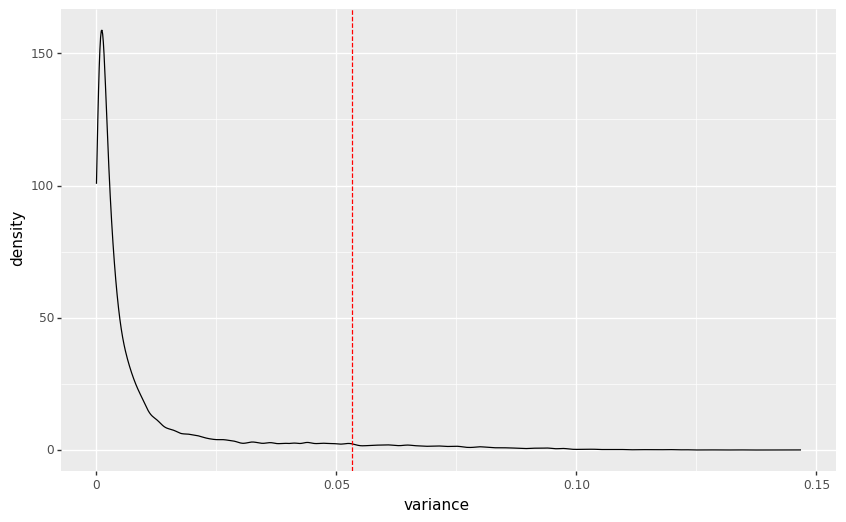

<ggplot: (8787583863175)>

In [15]:
# finding the smallest gene variation out of the 1000 largest gene variations to set the top 1000 gene variances threshold
n = variance_df["variance"].nlargest(1000)
variance_theshold = n.min().astype(float)

# plotting variance density chart and marking the 1000 largest gene variation cutoff
variance_density_plot = (
    p9.ggplot(variance_df, p9.aes(x="variance"))
    + p9.geom_density()
    + p9.geom_vline(xintercept=variance_theshold, linetype="dashed", color="red")
    + p9.theme(figure_size=(10, 6))
)

# save the figure
density_path = pathlib.Path("./figures/variance_density_plot.png")
variance_density_plot.save(density_path)
variance_density_plot

In [16]:
# first create new dataframe containing gene info as well as both adult-pediatric and male-female t-test results and variance results
df = variance_df.assign(
    ttest_A_vs_P=t_test.t_stat.astype(float),
    ttest_M_vs_F=t_test_sex.t_stat.astype(float),
)

# and save the new dataframe as a .csv
testing_df_output = pathlib.Path(
    "../0.data-download/data/genes_variances_and_t-tests_df.csv"
)
df.to_csv(testing_df_output, index=False)
print(df.shape)
df.head(3)

(16708, 4)


,gene_ID,variance,ttest_A_vs_P,ttest_M_vs_F
0,A1BG (1),0.005465,-3.262841,0.218504
1,A1CF (29974),0.004111,0.596718,0.847881
2,A2M (2),0.001192,1.382792,-1.150542


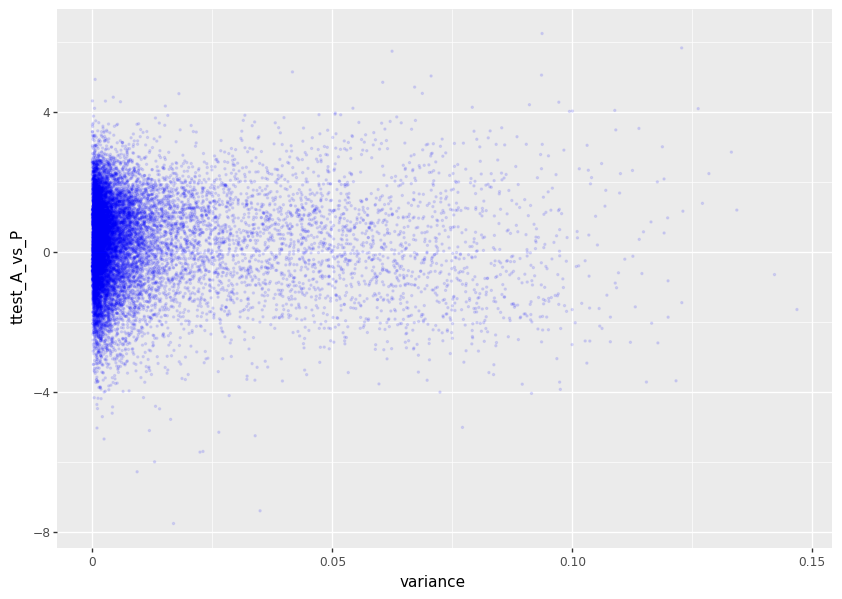

<ggplot: (8787589852971)>

In [17]:
# plot adult-pediatric ttest versus variance
A_vs_P_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_A_vs_P"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
)

# save the figure
adult_vs_pediatric_path = pathlib.Path(
    "./figures/adult-pediatric_ttest_vs_variance.png"
)
A_vs_P_by_variance_plot.save(adult_vs_pediatric_path)
A_vs_P_by_variance_plot

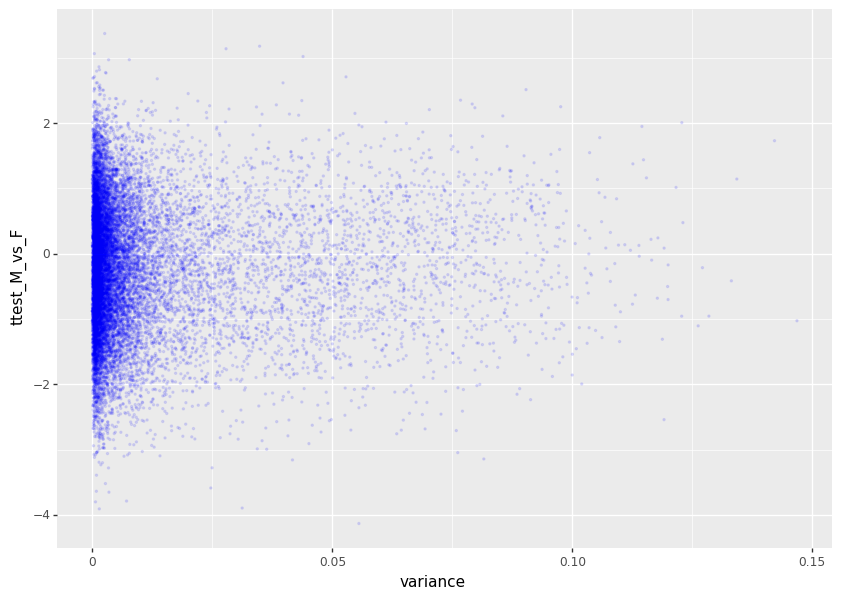

<ggplot: (8787582097042)>

In [18]:
# plot male-female ttest versus gene variance
M_vs_F_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_M_vs_F"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
)

# save the figure
male_vs_female_path = pathlib.Path("./figures/male-female_ttest_vs_variance.png")
M_vs_F_by_variance_plot.save(male_vs_female_path)
M_vs_F_by_variance_plot